### Utilize uma rede neural a partir de uma interpretação de regressão logística para classificar a base de dados iris

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Number of samples in training set:", X_train.shape[0])
print("Number of samples in testing set:", X_test.shape[0])

Number of samples in training set: 105
Number of samples in testing set: 45


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.

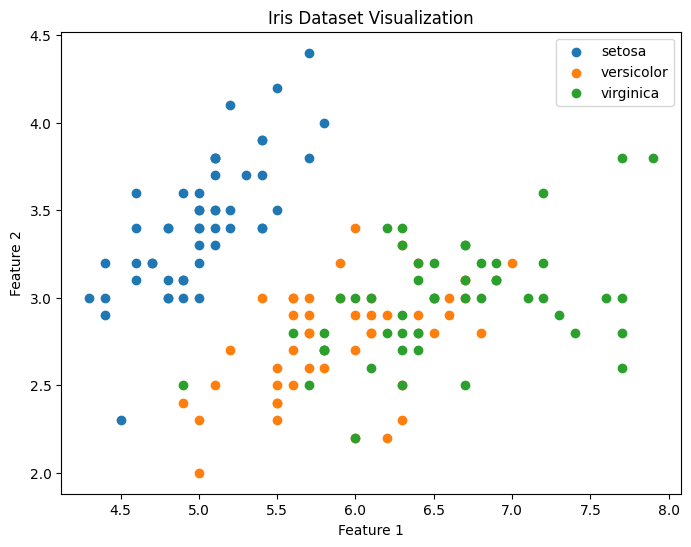

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

target_names = iris.target_names
print(iris.feature_names)
print(iris.DESCR)
# Create a scatter plot
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Iris Dataset Visualization')
plt.legend()
plt.show()


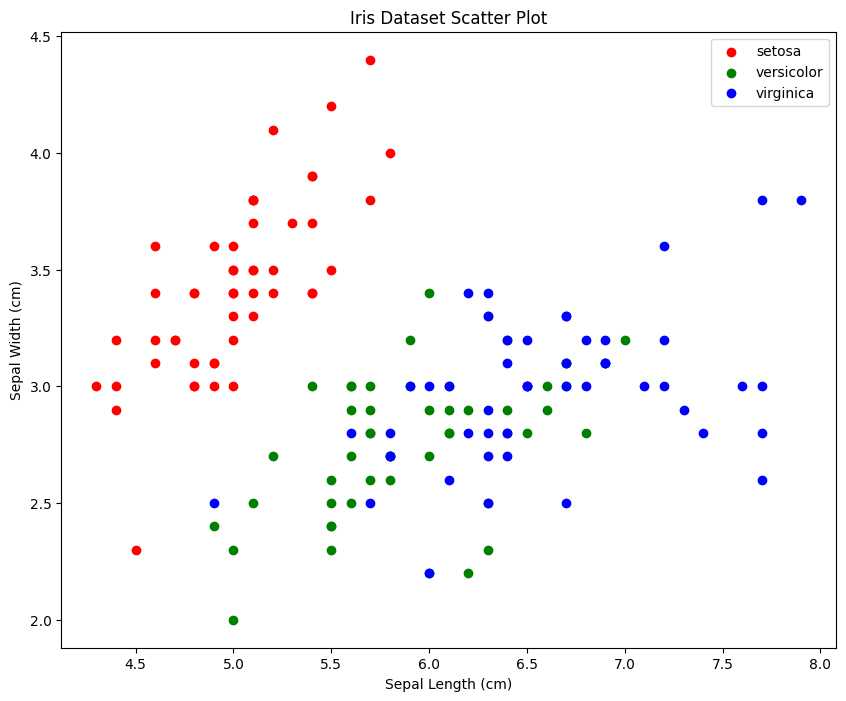

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot for Setosa (Class 0)
plt.scatter(X[y == 0, 0], X[y == 0, 1], label=target_names[0], color='red')

# Scatter plot for Versicolor (Class 1)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label=target_names[1], color='green')

# Scatter plot for Virginica (Class 2)
plt.scatter(X[y == 2, 0], X[y == 2, 1], label=target_names[2], color='blue')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset Scatter Plot')
plt.legend()
plt.show()


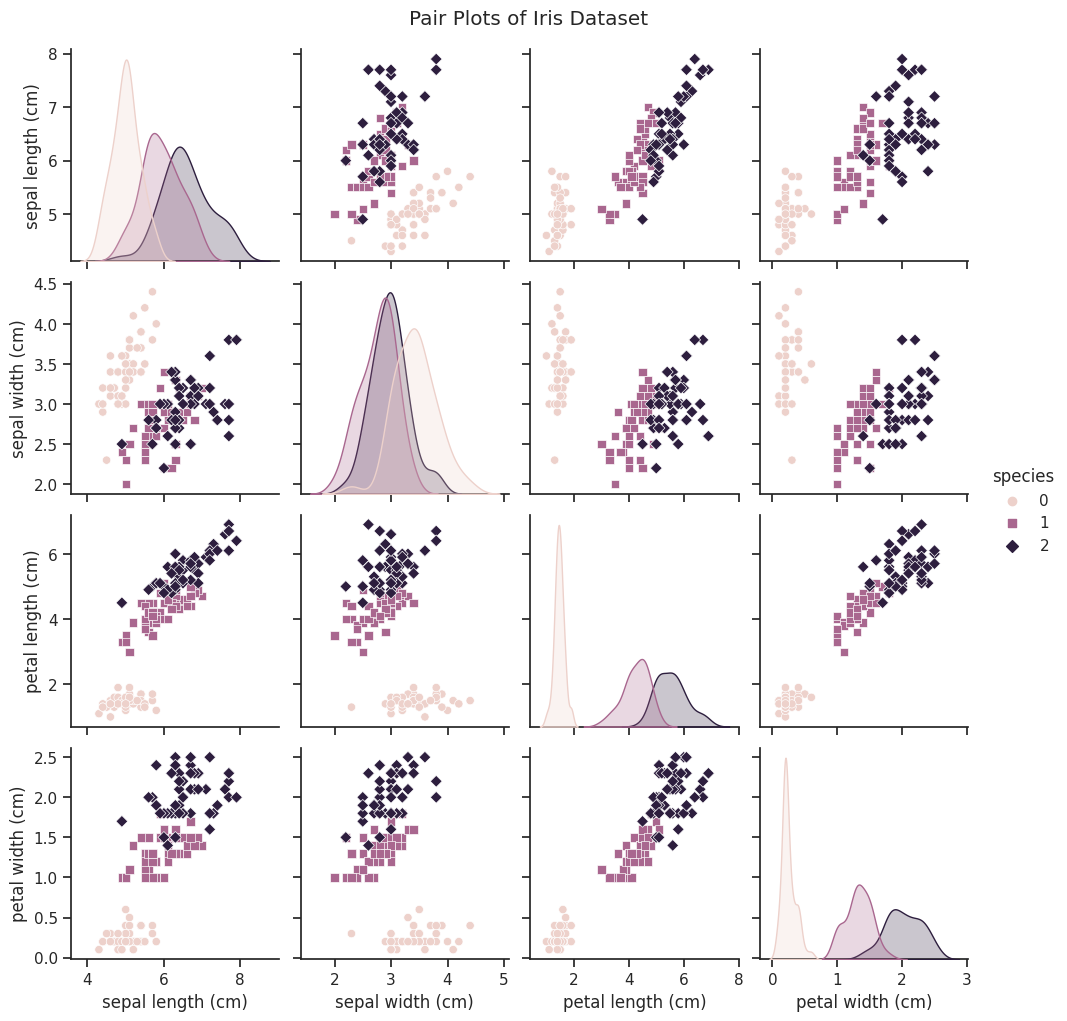

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Create a DataFrame for easier plotting
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = y

# Create pair plots using Seaborn
sns.set(style="ticks")
sns.pairplot(iris_df, hue="species", markers=["o", "s", "D"], diag_kind="kde")
plt.suptitle("Pair Plots of Iris Dataset", y=1.02)
plt.show()


In [14]:
import numpy as np

In [5]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = X_train.shape[0]
m_test = X_test.shape[0]
num_px = len(X_train[0])
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 105
Number of testing examples: m_test = 45
Height/Width of each image: num_px = 4
Each image is of size: (4, 4, 3)
train_set_x shape: (105, 4)
train_set_y shape: (105,)
test_set_x shape: (45, 4)
test_set_y shape: (45,)


In [18]:
def sigmoid(z):

    return 1/(1+np.exp(-z))

def initializer_parameters(dim):

    w = np.zeros((dim,1))
    b = 0

def forwardprop(w,b,X,Y):
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)

    # sigmoid do dot product da transposta de W com X para retonar um escalar que vai ser somado com b
    A = sigmoid((np.dot(w.T,X))+b)
    sumvalues = np.sum((Y*np.log(A))+(1-Y)*np.log(1-A))
    cost = -(1/m)*sumvalues
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)    ### END CODE HERE ###

    cost = np.squeeze(cost)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

def backprop(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = forwardprop(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w-(learning_rate*dw)
        b = b-learning_rate*db
        ### END CODE HERE ###
        
#         print(cost)
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs



def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T,X)+b)
    ### END CODE HERE ###
    
    Y_prediction[A > 0.5] = 1.
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction
    



In [19]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w = np.zeros((X_train.shape[0], 1))
    b = 0.0

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = backprop(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters['w']
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d


model(X_train,y_train,X_test,y_test)

ValueError: operands could not be broadcast together with shapes (105,) (1,4) 